# Klaszterezés (csoportosítás)

A [klaszterezés során](https://hu.wikipedia.org/wiki/Klaszteranal%C3%ADzis) egy adathalmaz pontjait, rekordjait hasonlóság alapján csoportosítjuk, úgy hogy az egy csoportban lévő objektumok minél inkább egymáshoz hasonlóak, míg a más csoportokban lévők pedig különbözőek legyenek.

![](https://bookdown.org/tpinto_home/Unsupervised-learning/kmeans.png)

Ábra 1. Klaszterezés példa. [Forrás](https://bookdown.org/tpinto_home/Unsupervised-learning/k-means-clustering.html).


# Példa

https://machinelearningmastery.com/clustering-algorithms-with-python/

Szintetikus adatok generálása:


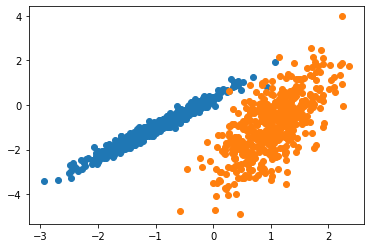

In [ ]:
# synthetic classification dataset
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from matplotlib import pyplot
# define dataset
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
# create scatter plot for samples from each class
for class_value in range(2):
	# get row indexes for samples with this class
	row_ix = where(y == class_value)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

In [ ]:
def show_clusters(clusters, X, yhat):
  # create scatter plot for samples from each cluster
  for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(yhat == cluster)
    # create scatter of these samples
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
  # show the plot
  pyplot.show()

## [Affinity propagation](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AffinityPropagation.html)

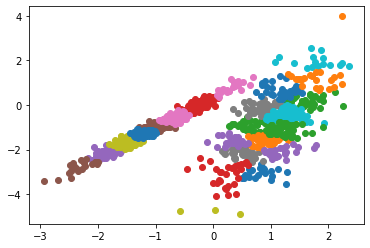

In [ ]:
# affinity propagation clustering
from sklearn.cluster import AffinityPropagation

# define the model
model = AffinityPropagation(damping=0.5)
# fit the model
model.fit(X)
# assign a cluster to each example
yhat = model.predict(X)
# retrieve unique clusters
clusters = unique(yhat)

show_clusters(clusters, X, yhat)

## [Agglomerative Clustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)

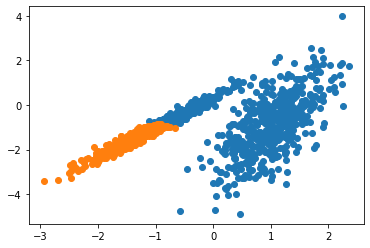

In [ ]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=2)
# fit model and predict clusters
yhat = model.fit_predict(X)
# retrieve unique clusters
clusters = unique(yhat)

show_clusters(clusters, X, yhat)

## [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

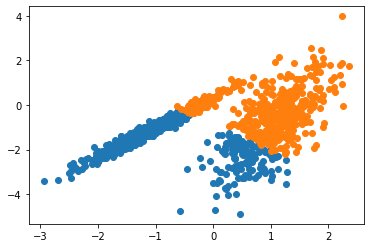

In [ ]:
# k-means clustering
from sklearn.cluster import KMeans

model = KMeans(n_clusters=2)
# fit the model
model.fit(X)
# assign a cluster to each example
yhat = model.predict(X)
# retrieve unique clusters
clusters = unique(yhat)
show_clusters(clusters, X, yhat)

## [BIRCH](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.Birch.html?highlight=birch)

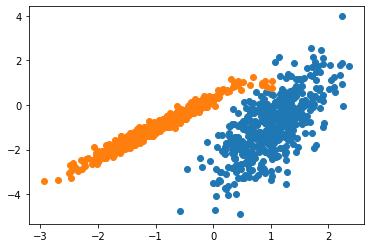

In [ ]:
from sklearn.cluster import Birch

model = Birch(threshold=0.01, n_clusters=2)
# fit the model
model.fit(X)
# assign a cluster to each example
yhat = model.predict(X)
# retrieve unique clusters
clusters = unique(yhat)
show_clusters(clusters, X, yhat)

## [DBSCAN](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html)

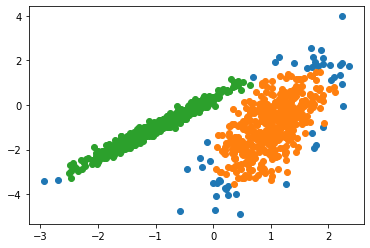

In [ ]:
# dbscan clustering
from sklearn.cluster import DBSCAN

model = DBSCAN(eps=0.30, min_samples=9)
# fit model and predict clusters
yhat = model.fit_predict(X)
# retrieve unique clusters
clusters = unique(yhat)
show_clusters(clusters, X, yhat)

[Stb.](https://machinelearningmastery.com/clustering-algorithms-with-python/)

# Feladatok

1.	K-means algoritmus segítségével klaszterezzük a következő ponthalmazokat:
```python
from sklearn.datasets.samples_generator import make_blobs 
X1, y_true1 = make_blobs(n_samples=500, centers=5, cluster_std=0.55, random_state=42) 
from sklearn.datasets import make_moons 
X2, y_true2 = make_moons(200, noise=.05, random_state=42)
```

2. Elemezzük hogyan viselkedik a módszer különböző `K` paraméterek esetében, illetve ismételt futtatás esetében (különböző `random_state` értékek).

3. Miért észlelünk javulást, ha a második ponthalmaz esetében `SpectralClustering` módszerrel és legközelebbi szomszéd affinitással klaszterezünk?
```python
from sklearn.cluster import SpectralClustering 
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', assign_labels='kmeans') 
labels = model.fit_predict(X2) 
plt.scatter(X2[:, 0], X2[:, 1], c=labels, s=50, cmap='viridis');
```

4. Klaszterezzük a [„The Digit Dataset”]((https://scikit-learn.org/stable/auto_examples/datasets/plot_digits_last_image.html)) számjegy adathalmazt:
```python
from sklearn.datasets import load_digits 
digits = load_digits()
```

5. Mérjük meg, hogy a klaszterezés (felügyelet nélküli tanulás) mennyire volt sikeres az adatokban lévő hasonló számok csoportosításában. A számjegyek helyes címkézését a következő utasítássorozattal kaphatjuk meg:
```python
from scipy.stats import mode 
labels = np.zeros_like(clusters) 
for i in range(10): 
        mask = (clusters == i) 
        labels[mask] = mode(digits.target[mask])[0]
```

6.	A konfuziós mátrix segítségével, vizsgáljuk meg, hogy a klaszterezés melyik számjegyeket csoportosítja helytelenül a legtöbbször.